In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
%matplotlib inline

In [2]:
#ファイルからデータをもらう
def loadfile():
    a = np.loadtxt('dat1.txt')
    b = np.loadtxt('dat2.txt')
    n = np.shape(a)
    c = np.array([a, b])
    return c,n[0]

In [3]:
#観測データを白色化する
def white(x):
    s = np.shape(x)
    mean = x.mean(axis=-1)
    for i in range(s[0]):
        for j in range(s[1]):
            x[i][j] = x[i][j] - mean[i]
    sig = np.dot(x, x.T)
    D,E = np.linalg.eig(sig)
    n = np.shape(D)
    for i in range(s[0]):
        D[i] = math.sqrt(D[i])
    d = np.diag(1/D)
    V = np.dot(d, E.T)
    z = np.dot(V, x)
    return z

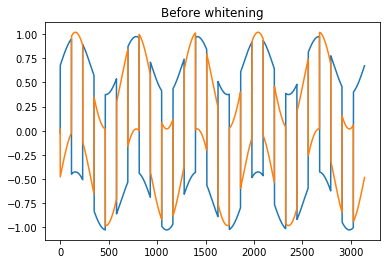

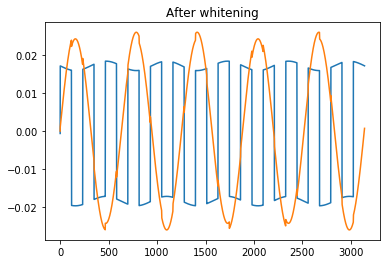

In [4]:
#dat1とdat2を表示する
x,n = loadfile()
z = white(x)
t = [i for i in range(n)]

plt.title("Before whitening")
plt.plot(t, [x[0,i] for i in range(x.shape[1])], label='dat1')
plt.plot(t, [x[1,i] for i in range(x.shape[1])], label='dat2')
plt.show()

plt.title("After whitening")
plt.plot(t, [z[0,i] for i in range(z.shape[1])], label='dat1')
plt.plot(t, [z[1,i] for i in range(z.shape[1])], label='dat2')
plt.show()

In [5]:
def Decorrelation(W):
    D, E = np.linalg.eigh(np.dot(W, W.T))
    return np.dot(np.dot(E * (1. / np.sqrt(D)), E.T), W)

In [6]:
##何度か実行してからWの適切な初期値を得ました
def gradient(z):
    s = np.shape(z)
    m = s[0]
    W = np.random.rand(m, m)
    W[0][0] = 0.30917272
    W[0][1] = 0.53698976
    W[1][0] = 0.94546734
    W[1][1] = 0.37961822
    print("ランダムに生成するWは以下です：")
    print(W)
    lim = 200
    for j in range(200):
        W1 = W
        W = W/np.linalg.norm(W)
        y = np.dot(W.T,z)
        W = (z * pow(y,3)).mean(axis=-1) - 3*W
        W = W/np.linalg.norm(W)
        W = Decorrelation(W)
        lim = max( abs(abs(np.diag(np.dot(W, W1.T))) - 1))
        if lim < 0.0001:
            break
            
    return W

In [7]:
W = gradient(z)
print("収束して得たWは以下です：")
print(W)

ランダムに生成するWは以下です：
[[ 0.30917272  0.53698976]
 [ 0.94546734  0.37961822]]
収束して得たWは以下です：
[[-0.04746587  0.99887286]
 [ 0.99887286  0.04746587]]


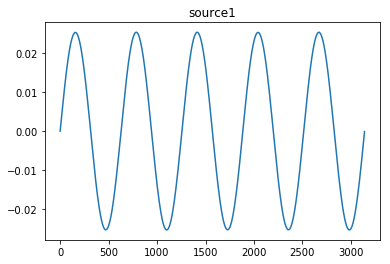

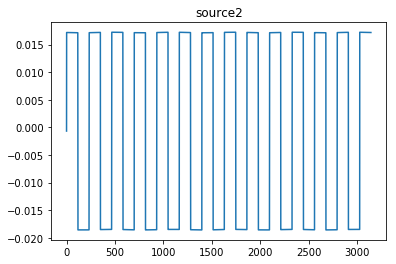

In [8]:
y = np.dot(W,z)
plt.title("source1")
plt.plot(t, [y[0,i] for i in range(y.shape[1])])
plt.show()
plt.title("source2")
plt.plot(t, [y[1,i] for i in range(y.shape[1])])
plt.show()